#**Problem Statement**  
Objective: Predict the price of a vehicle based on its specifications such as make, model, year, mileage, engine, fuel type, transmission, body type, etc.

Problem Type:  Supervised Learning --> Regression

Target Variable:- price  
  
  The goal of this project is to predict the resale price of a vehicle using historical vehicle data. This can help dealerships, pricing platforms, and customers make data-driven pricing decisions.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Dataset

In [115]:
df = pd.read_csv("/content/dataset.csv")

#Understanding the data

In [116]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


#Checking the number of rows and columns

In [117]:
df.shape

(1002, 17)

#Getting the information about numerical and categorical data

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

#**Exploratory Data Analysis (EDA)**

#Find the summary *Statistics* among the numerical features.

In [119]:
df.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


Check for null values if present i need to handle them for that i used:

In [120]:
df.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,23
engine,2
cylinders,105
fuel,7
mileage,34


#Finding non-numeric columns

In [121]:
for col in df.select_dtypes(include='object').columns:
    print(col, ":", df[col].nunique())

name : 358
description : 761
make : 28
model : 153
engine : 100
fuel : 7
transmission : 38
trim : 197
body : 8
exterior_color : 263
interior_color : 91
drivetrain : 4


#**Data Cleaning**

#**Handle Missing Values**
Numerical --> fill with median

Categorical  --> fill with mode

Median is robust to outliers for numerical data.  
Mode is best for categorical data

#For that first identifying the **Numerical** and **Categorical** columns

In [122]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [123]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#Price Distribution

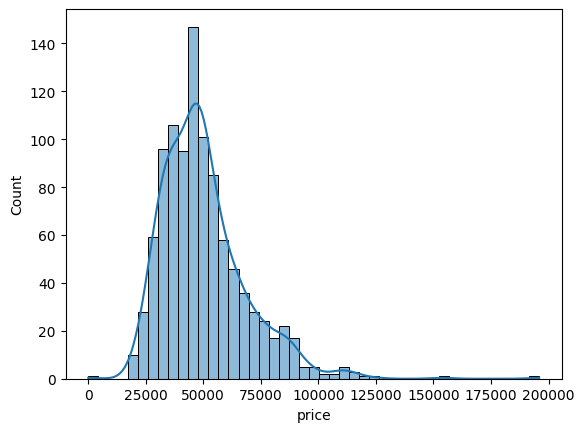

In [124]:
sns.histplot(df['price'], kde=True)
plt.show()

This histplot signifies that data is right skewed means mean > median

#**Price vs Year**

This scatterplot signifies that Prices vary a lot within the same year. So, no strong linear relationships between price and year

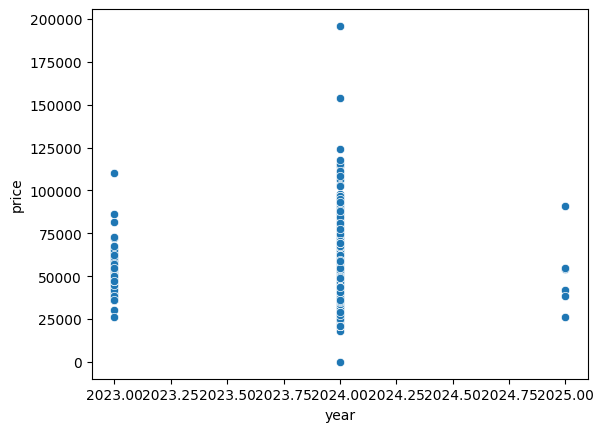

In [125]:
sns.scatterplot(x='year', y='price', data=df)
plt.show()

#**Correlation Heatmap**

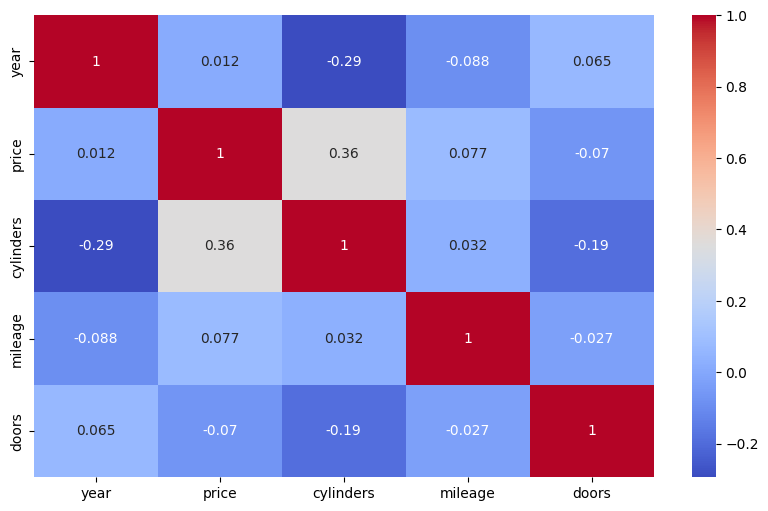

In [126]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

Newer vehicles cost more, mileage negatively impacts price.

#**Feature Engineering**

#Drop unnecessary columns.  
Dropped columns such as description and dealer_name because:  

• They do not contribute to price prediction  

• They introduce high cardinality  

• They may cause data leakage


#Finding the age of vehicle as it is necessary because:-  
Buyers care about age, and not the exact year.

Price drops as age increases --> strong relationship.

In [127]:
import datetime

current_year = datetime.datetime.now().year
df['vehicle_age'] = current_year - df['year']
df.drop(columns=['year'], inplace=True)

In [128]:
df.head()

,name,description,make,model,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,vehicle_age
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,2
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,2
2,2024 GMC Yukon XL Denali,\n \n .\n \n,GMC,Yukon XL,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,2
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,3
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,2


In [129]:
df.drop(columns=['name', 'description'], inplace=True)

#Splitting the data into independent and the dependent features

In [136]:
X = df.drop('price', axis=1)
y = df['price']

#Encoding  
Categorical variables were encoded using Label Encoding to convert text categories into numerical format required by ML models.

In [137]:
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


#Splitting the data into training and testing:- Using the train-test-split.

In [138]:
from sklearn.model_selection import train_test_split

Splitted the dataset in such a way that training contains 80% and test contains 20%

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Standardizing the data**:- So that it have mean=0 and standard deviation=1

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**Model Training**:- We will use Multiple models and compare the results thereof:  
We will use:-  




*   Linear Regression
*   Ridge Regression

*   Lasso Regression
*   Decision Tree Regressor

*   Random Forest Regressor
*   Support Vector Regressor











#**Linear Regression**

In [142]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [143]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)

#Ridge Regression

In [144]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

ridge_pred = ridge.predict(X_test_scaled)

#Lasso Regression

In [145]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

lasso_pred = lasso.predict(X_test_scaled)

#Decision Tree Regressor

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

#**Random Forest Regressor**

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

#Support Vector Regressor

In [150]:
from sklearn.svm import SVR

In [151]:
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

svr_pred = svr.predict(X_test_scaled)

#Defining our function for model evaluation

  **Accuracy**:-  
  Accuracy is not applicable for regression. I evaluated my models using R² score, RMSE, and MAE.

In [157]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
def evaluate(y_test, y_pred):
    return {
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }


#Calculating the metrics used in the model

**R² score**:-R² score represents the proportion of variance in vehicle prices explained by the model, indicating its overall goodness of fit  
**Mean Absolute Error (MAE)**:- MAE quantifies the average absolute difference between predicted and actual vehicle prices, providing a clear measure of typical prediction error.  
**Root Mean Square Error (RMSE)**:- RMSE emphasizes larger prediction errors by squaring deviations, making it effective for evaluating real-world price prediction accuracy.

In [158]:
results = {
    "Linear Regression": evaluate(y_test, lr_pred),
    "Ridge Regression": evaluate(y_test, ridge_pred),
    "Lasso Regression": evaluate(y_test, lasso_pred),
    "Decision Tree": evaluate(y_test, dt_pred),
    "Random Forest": evaluate(y_test, rf_pred),
    "SVR": evaluate(y_test, svr_pred)
}

results_df = pd.DataFrame(results).T
results_df.sort_values(by="R2", ascending=False)

,R2,RMSE,MAE
Random Forest,0.716456,8501.531013,4339.109355
Decision Tree,0.267168,13667.512572,5850.162521
Ridge Regression,0.194062,14333.029132,11248.837633
Lasso Regression,0.193685,14336.378834,11250.954730
Linear Regression,0.193684,14336.392276,11250.963262
SVR,-0.002385,15984.698769,12207.429506


#**Model Comparison & Conclusion**

The Random Forest Regressor outperforms all other algorithms across all evaluation metrics.  
It achieves a significantly higher R² score 0.71, indicating a much better ability to explain variance in vehicle prices.  
Additionally, it records substantially lower MAE and RMSE, demonstrating more accurate predictions and reduced large errors.  
Therefore, **Random Forest Regressor** is selected as the final model for prediction due to its superior predictive performance.

#**Analysis of Feature Contributions to Vehicle Price Prediction**

In [159]:
importances = rf.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_df.head(20)

,Feature,Importance
4,fuel,0.191071
3,cylinders,0.160477
0,make,0.152310
1,model,0.151492
7,trim,0.095860
5,mileage,0.056122
2,engine,0.047788
10,exterior_color,0.032327
12,drivetrain,0.029918
6,transmission,0.029039


#Plotting the features on the basis of their importances in predicting the vehicle prices

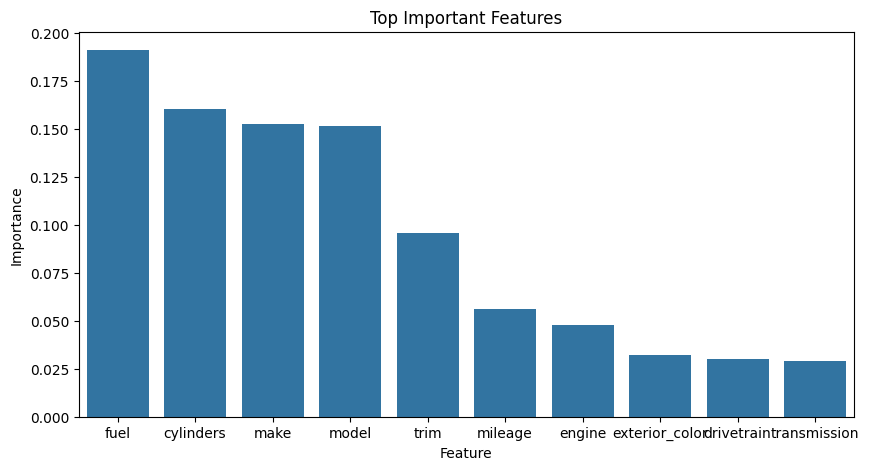

In [160]:
plt.figure(figsize=(10,5))
sns.barplot(x="Feature", y="Importance", data=feature_df.head(10))
plt.title("Top Important Features")
plt.show()

#Making the final Predictions on our new data

In [161]:
new_vehicle = {
    'make': 4,
    'model': 10,
    'engine': 6,
    'cylinders': 4,
    'fuel': 3,
    'mileage': 21,
    'transmission': 4,
    'trim': 10,
    'body': 4,
    'doors': 4,
    'exterior_color': 6,
    'interior_color': 5,
    'drivetrain': 3,
    'vehicle_age':3
}

new_df = pd.DataFrame([new_vehicle])
price_pred = rf.predict(new_df)[0]
print("The predicted price of the vehicle is ", price_pred)

The predicted price of the vehicle is  69615.62


#This model can help us to estimate the vehicle prices based on features like year, fuel type, transmission, mileage etc.